<h1 align="center">Predicting Diabetes in Pima Indian Women</h1> 

# Introduction

The objective of this project is to predict whether or not a patient has diabetes using the popular public dataset regarding Pima Indian Women. All of the women are of Pima Indian heritage and at least 21 years old.

# Description

The dataset consists of 9 diagnostic predictor variables and a binary classifier variable "diabetes". 
The features include the number of pregnancies each woman has had, glucose concentration, diastolic blood pressure, triceps skinfold thickness, insulin level, body mass index (BMI), a diabetes pedigree function (which relates the familial diabetes history of the subject), age, and another skinfold measurement. There are 768 records with 268 women who have diabetes and 500 who do not.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Specify column names only when data csv does not have labels for columns
df = pd.read_csv("pima_diabetes.csv", names = ["num_pregnancies", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age", "skin", "diabetes"])

# Data Exploration: statistical

In [3]:
df.describe()

,num_pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [4]:
#Map boolean to int do not use quotes as boolean is not a string!!!
df['diabetes'] = df['diabetes'].map({False: 0, True: 1})

In [5]:
df.isnull().sum()

num_pregnancies    0
glucose_conc       0
diastolic_bp       0
thickness          0
insulin            0
bmi                0
diab_pred          0
age                0
skin               0
diabetes           0
dtype: int64

# Data Exploration: Draw a NxN pairplot

In [6]:
import seaborn as sns
pair_plot = sns.pairplot(df.iloc[:, :-1])

In [7]:
#Drop linearly correlated features
df.drop("skin", axis=1, inplace=True, errors='ignore')
df.drop("thickness", axis=1, inplace=True, errors='ignore')

# Imputing the data


In [8]:
mask = df[['glucose_conc', 'diastolic_bp', 'insulin','bmi']] == 0
df[mask] = np.nan
df.head()

,num_pregnancies,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,168.0,43.1,2.288,33,1


In [9]:
df.describe()

,num_pregnancies,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
count,768.000000,763.000000,733.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
from sklearn.preprocessing import Imputer

#Impute with mean all nan values
fill_nan = Imputer(missing_values=np.nan, strategy="mean", axis=0)

df["insulin"] = fill_nan.fit_transform(df["insulin"].values.reshape(-1, 1))
#df["thickness"] = fill_nan.fit_transform(df["thickness"].values.reshape(-1, 1))
df["diab_pred"] = fill_nan.fit_transform(df["diab_pred"].values.reshape(-1, 1))
df["glucose_conc"] = fill_nan.fit_transform(df["glucose_conc"].values.reshape(-1, 1))
df["bmi"] = fill_nan.fit_transform(df["bmi"].values.reshape(-1, 1))
df["diastolic_bp"] = fill_nan.fit_transform(df["diastolic_bp"].values.reshape(-1, 1))

df.head(25)

,num_pregnancies,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.000000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,155.548223,32.457464,0.232,54,1


# Data modelling

In [11]:
from sklearn.model_selection import train_test_split

# Get X and y
#x = df[["num_pregnancies", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age", "skin"]].values

x = df.iloc[:,:-1].values
x.shape

(768, 7)

In [12]:
y = df['diabetes'].values
y.shape

(768,)

# Split Dataset

In [13]:
# split dataset into test/train  using All features
def splitDataset():
    x_train90, x_test10, y_train90, y_test10 = train_test_split(x, y, random_state=1, test_size=0.1)
    x_train80, x_test20, y_train80, y_test20 = train_test_split(x, y, random_state=1, test_size=0.2)
    x_train70, x_test30, y_train70, y_test30 = train_test_split(x, y, random_state=1, test_size=0.3)
    return x_train90, x_test10, y_train90, y_test10,x_train80, x_test20, y_train80, y_test20, x_train70, x_test30, y_train70, y_test30

In [14]:
x_train90, x_test10, y_train90, y_test10, x_train80, x_test20, y_train80, y_test20, x_train70, x_test30, y_train70, y_test30 = splitDataset()

# Standardize

In [15]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
# standardize only your training set....not your test set. Pay attention to the fit_transform() vs transform()

stdsc = StandardScaler()
x_train90_std = stdsc.fit_transform(x_train90)
x_test10_std = stdsc.transform(x_test10)
x_train80_std = stdsc.fit_transform(x_train80)
x_test20_std = stdsc.transform(x_test20)
x_train70_std = stdsc.fit_transform(x_train70)
x_test30_std = stdsc.transform(x_test30) 

# Select which train/test data to run

In [16]:
xtrain = x_train70_std
ytrain = y_train70
xtest = x_test30_std
ytest = y_test30

# Explore a few Models

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine
from sklearn.svm import SVC
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Neural Network
from sklearn.neural_network import MLPClassifier
#Naives Bayes
from sklearn.naive_bayes import GaussianNB

log_reg = LogisticRegression(C = 1)
knn = KNeighborsClassifier(n_neighbors=3)
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1)
forest = RandomForestClassifier(n_estimators=1, random_state=0)
nn = MLPClassifier()
nb = GaussianNB()

# Cross validation

In [18]:
from sklearn.model_selection import cross_val_score

classifiers = [log_reg, knn, svm_linear, svm_rbf, forest, nn, nb]
classifiers_labels = ["log_reg", "knn", "svmlinear", "svmrbf","forest", "NeuralNet", "NaiveBayes"]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, xtrain, ytrain, scoring='accuracy', cv=8))

# k-fold scores, mean, min, max etc

In [19]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8],
                               index=["LR", "KNN", "SVM-Linear", "SVM-Rbf", "RandomForest", "NeuralNet", "NaiveBayes"])
models_df["Mean-kfold"] = models_df.mean(axis=1)
models_df["STD-kfold"] = models_df.std(axis=1)
models_df["Max-kfold"] = models_df.max(axis=1)
models_df

,1,2,3,4,5,6,7,8,Mean-kfold,STD-kfold,Max-kfold
LR,0.705882,0.779412,0.761194,0.805970,0.820896,0.701493,0.731343,0.803030,0.763652,0.043471,0.820896
KNN,0.691176,0.705882,0.731343,0.656716,0.761194,0.656716,0.641791,0.727273,0.696512,0.039720,0.761194
SVM-Linear,0.705882,0.764706,0.761194,0.761194,0.820896,0.701493,0.746269,0.818182,0.759977,0.041320,0.820896
SVM-Rbf,0.705882,0.794118,0.791045,0.731343,0.805970,0.701493,0.716418,0.787879,0.754268,0.041575,0.805970
RandomForest,0.617647,0.705882,0.611940,0.761194,0.716418,0.641791,0.791045,0.696970,0.692861,0.061099,0.791045
NeuralNet,0.705882,0.808824,0.746269,0.701493,0.791045,0.686567,0.716418,0.742424,0.737365,0.040911,0.808824
NaiveBayes,0.676471,0.735294,0.701493,0.656716,0.850746,0.731343,0.731343,0.818182,0.737699,0.062211,0.850746


# Full training set scores

In [20]:
model_scores_full_train = []

log_reg.fit(xtrain, ytrain)
model_scores_full_train.append(log_reg.score(xtest, ytest))

knn.fit(xtrain, ytrain)
model_scores_full_train.append(knn.score(xtest, ytest))

svm_linear.fit(xtrain, ytrain)
model_scores_full_train.append(svm_linear.score(xtest, ytest))
svm_rbf.fit(xtrain, ytrain)
model_scores_full_train.append(svm_rbf.score(xtest, ytest))

forest.fit(xtrain, ytrain)
model_scores_full_train.append(forest.score(xtest, ytest))

nn.fit(xtrain, ytrain)
model_scores_full_train.append(nn.score(xtest, ytest))

nb.fit(xtrain, ytrain)
model_scores_full_train.append(nn.score(xtest, ytest))


In [21]:
models_df["Full"] = model_scores_full_train
#models_df

In [22]:
#models_df.describe()
models_df

,1,2,3,4,5,6,7,8,Mean-kfold,STD-kfold,Max-kfold,Full
LR,0.705882,0.779412,0.761194,0.805970,0.820896,0.701493,0.731343,0.803030,0.763652,0.043471,0.820896,0.779221
KNN,0.691176,0.705882,0.731343,0.656716,0.761194,0.656716,0.641791,0.727273,0.696512,0.039720,0.761194,0.779221
SVM-Linear,0.705882,0.764706,0.761194,0.761194,0.820896,0.701493,0.746269,0.818182,0.759977,0.041320,0.820896,0.779221
SVM-Rbf,0.705882,0.794118,0.791045,0.731343,0.805970,0.701493,0.716418,0.787879,0.754268,0.041575,0.805970,0.792208
RandomForest,0.617647,0.705882,0.611940,0.761194,0.716418,0.641791,0.791045,0.696970,0.692861,0.061099,0.791045,0.623377
NeuralNet,0.705882,0.808824,0.746269,0.701493,0.791045,0.686567,0.716418,0.742424,0.737365,0.040911,0.808824,0.822511
NaiveBayes,0.676471,0.735294,0.701493,0.656716,0.850746,0.731343,0.731343,0.818182,0.737699,0.062211,0.850746,0.822511


# Box plots: choose top performing Models

Text(0.5,1,'Classification Accuracy using All Features')

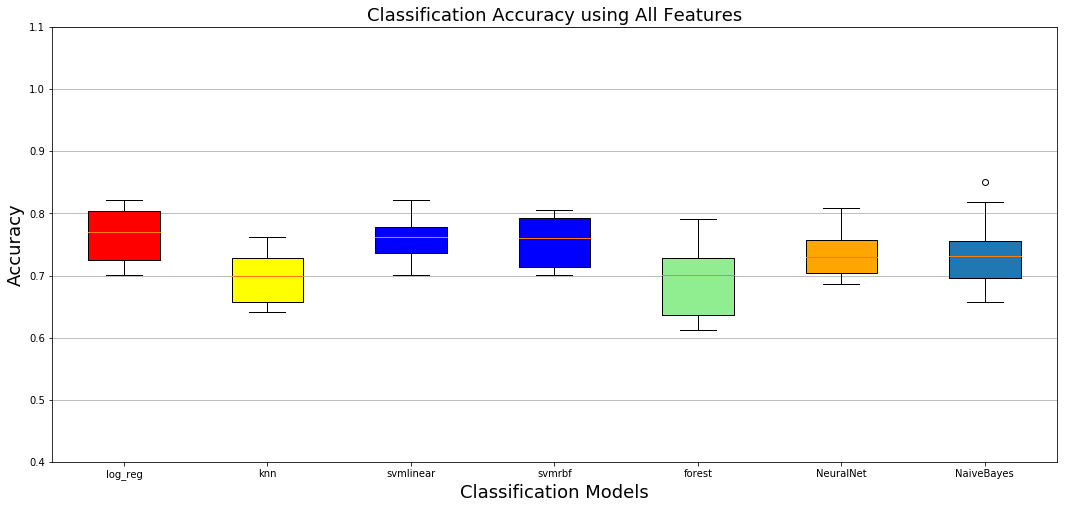

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["red", "yellow", "blue", "blue", "lightgreen", "orange"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xticklabels(classifiers_labels)
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# GRID Searching best params for models of interest: LR, SVM, NN

In [24]:
# Grid Search
from sklearn.grid_search import GridSearchCV

param_range = [0.01, 0.1, 1.0, 3, 5, 10.0]
max_depth = [1, 2, 3, 5, 7, None]
n_estimators = [1, 5, 10]
max_features = [None, 'auto']

classifiers = [{"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":SVC(random_state=0), "param_grid":[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}]},
               {"clf":MLPClassifier(), "param_grid":[{"hidden_layer_sizes":(100,)}]}]


# 10x3 Nested Cross Validation  (algorithm comparison using the full feature set)
model_scores = []
for clf in classifiers:
    # Inner Cross Validation, searches for the best parameters
    gs = GridSearchCV(estimator=clf["clf"], param_grid=clf["param_grid"], scoring='accuracy', cv=3)
    # Outer Cross Validation, evaluates the model
    model_scores.append(cross_val_score(gs, xtrain, ytrain, scoring='accuracy', cv=10))

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "SVM", "NeuralNet"])

models_df["Mean-grid"] = models_df.mean(axis=1)
models_df["STD-grid"] = models_df.std(axis=1)
models_df["Max-grid"] = models_df.max(axis=1)

models_df

,1,2,3,4,5,6,7,8,9,10,Mean-grid,STD-grid,Max-grid
LR,0.709091,0.727273,0.818182,0.777778,0.830189,0.830189,0.735849,0.698113,0.754717,0.773585,0.765496,0.046412,0.830189
SVM,0.690909,0.709091,0.818182,0.759259,0.773585,0.830189,0.716981,0.716981,0.792453,0.754717,0.756235,0.045280,0.830189
NeuralNet,0.709091,0.763636,0.800000,0.703704,0.754717,0.830189,0.679245,0.698113,0.735849,0.716981,0.739153,0.045571,0.830189


# After grid search, train-test on full dataset: LR, SVM

In [25]:
gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3, refit=True)
gs.fit(xtrain, ytrain)
train_score = gs.score(xtrain, ytrain)
test_score = gs.score(xtest, ytest)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.7672253258845437 
Test score: 0.7792207792207793


In [26]:
gs = GridSearchCV(estimator=svm_linear, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(xtrain, ytrain)
train_score = gs.score(xtrain, ytrain)
test_score = gs.score(xtest, ytest)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.8026070763500931 
Test score: 0.7965367965367965


# Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
    
def drawConfusionMatrix(model, label, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    confmat = confusion_matrix(y_true=ytest, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel(label + ' predicted label')
    plt.ylabel(label + ' true label')

    # Precision, Recall, and F1 scores
    p = precision_score(y_true=ytest, y_pred=y_pred)
    r = recall_score(y_true=ytest, y_pred=y_pred)
    f = f1_score(y_true=ytest, y_pred=y_pred)

    #print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
    #print(classification_report(ytest, y_pred, target_names=["0", "1"]))
    
    return p,r,f

In [29]:
precision = []
recall = []
f1 = []

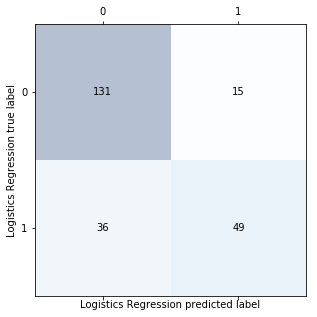

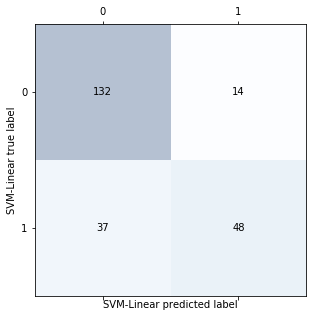

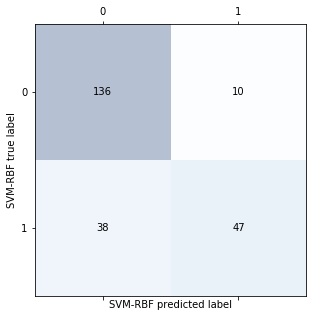

In [30]:
precision = []
recall = []
f1 = []

def draw(clf, string):
    p,r,f = drawConfusionMatrix(clf, string, xtrain, ytrain, xtest, ytest)
    precision.append(p)
    recall.append(r)
    f1.append(f)

draw(log_reg, "Logistics Regression")
draw(svm_linear, "SVM-Linear")
draw(svm_rbf, "SVM-RBF")

# Discussion

Extensive runs using 5 different models were done. SVM model edges out Logistical Regression with 79% accuracy. Precision & f1 stats are nearly the same for both models. Having said that, more data exploration might be worthwhile to boost accuracy scores higher

# Conclusion

This simple dataset was fairly useful in exploring data cleaning, feature engineering, grid-search based cross-validation and arriving with a reasonably accurate machine model. 